# Práctica Procesos aleatorios
## Solución Problema 2
### Proceso aleatorio sinusoidal

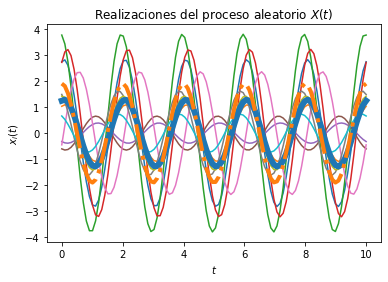

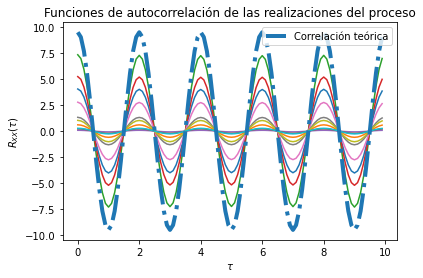

In [4]:
# Solución ejercicio 2 práctica E13 Procesos Aleatorios

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias A y Z
vaA = stats.norm(3, np.sqrt(10))
vaZ = stats.uniform(-np.pi/2, np.pi)

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (A y Z independientes)
for i in range(N):
	A = vaA.rvs()
	Z = vaZ.rvs()
	x_t = A * np.cos(np.pi*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 6/np.pi * np.cos(np.pi*t)
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 19/2 * np.cos(np.pi*taus)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()

## Solución Problema 4
### Proceso aleatorio sinusoidal

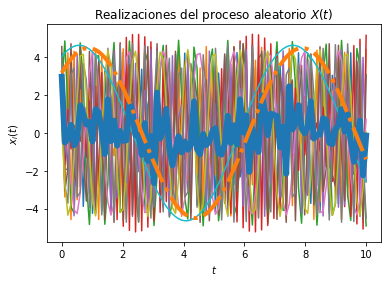

In [3]:
# Solución ejercicio 4 práctica E13 Procesos Aleatorios

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias C, Z(Theta) y O(Omega)
vaC = stats.norm(5, np.sqrt(0.2)) 
vaO = stats.uniform(np.pi*2*(59.1), np.pi*2*(60.1))   
vaZ = stats.uniform(0, np.pi/2)

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (C, Z y O independientes)
for i in range(N):
	C = vaC.rvs()
	Z = vaZ.rvs()
	O = vaO.rvs()
	x_t = C * np.cos(O*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 10/np.pi * (np.cos(O*t)-np.sin(O*t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()
